<h1>UNAD - Universidad Nacional Abierta y a Distancia</h1>

<h3>Estudiante<br>
<b>Victor Javier Fortich Carabali</b><br>
Ingeniería de Sistemas.<br>
Proyecto Análisis de Datos.</h3>


<h2>Dataset – Titanic</h2>
<h2><b>Regresión Logistica</b></h2>
<p><b>Conjunto de datos del Titanic</b><br></p>
<p>El hundimiento del Titanic es uno de los naufragios más infames de la historia.</p>
<p>El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1.502 de los 2.224 pasajeros y tripulantes.</p>
<p>Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.</p>
<p>En este desafío, le pedimos que construya un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de los pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).</p>

<br><b>Pasos de la Actividad</b><br>
<ol>
<li>Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</li>
<li>Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</li>
<li>Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</li>
<li>Dividir el dataset en Train y Test para evaluar correctamente el modelo.</li>
<li>Entrenar el modelo configurando los diferentes hiperparámetros.</li>
<li>Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</li>
<li>Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</li>
<li>Interpretar, analizar y documentar los resultados obtenidos.</li>
<li>Cargar en GitHub el código del modelo diseñado https://github.com/</li>
</ol>
<p></p>

<h2> Desarrollo de la actividad</h2>

<h3><b>1. Realizaaar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</b></h3>

In [282]:
#Librerias
import pandas as pd                # Sirve para el manejo y análisis de estructuras de datos
import numpy as np                 # Sirve para cálcular el numérico y el análisis de datos
import seaborn as sns              # Sirve para la creación gráficos estadísticos
import matplotlib.pyplot as plt    # Sirve para la creación de gráficos en dos dimensiones

#Librerías - Modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [283]:
#Lectura de datos en Python y lo cargamos en la variable DatosRegresionLineal
DatosRegresionLogistica = pd.read_csv('./BD Titanic Dataset.csv')

In [284]:
#Se realiza la lectura de los Datos para el análisis exploratorio
DatosRegresionLogistica.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [285]:
#Descripción del archivo
DatosRegresionLogistica.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [286]:
#Descripción del archivo
DatosRegresionLogistica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Tarifa')

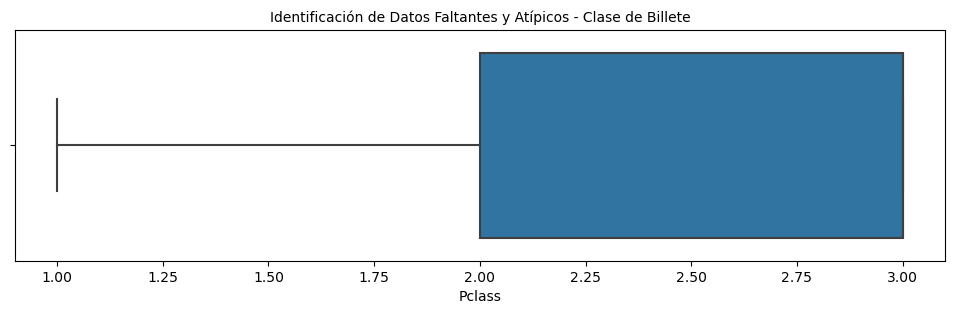

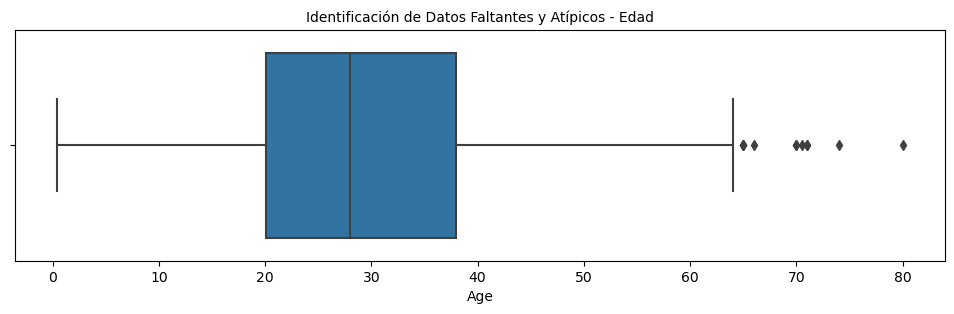

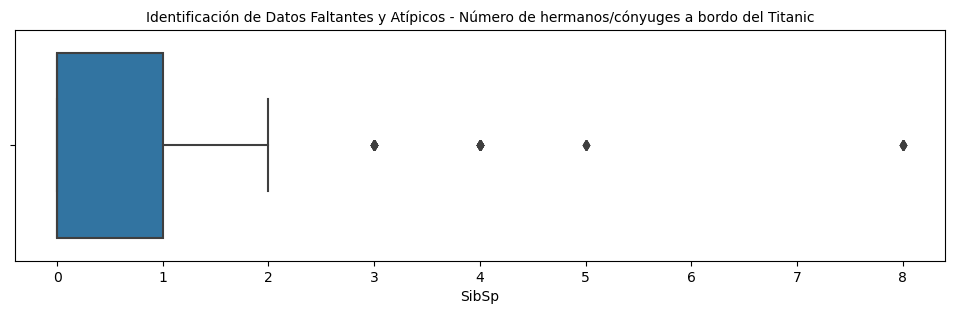

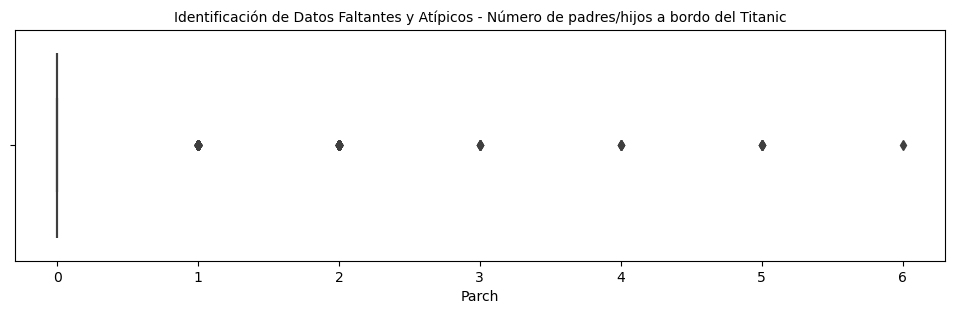

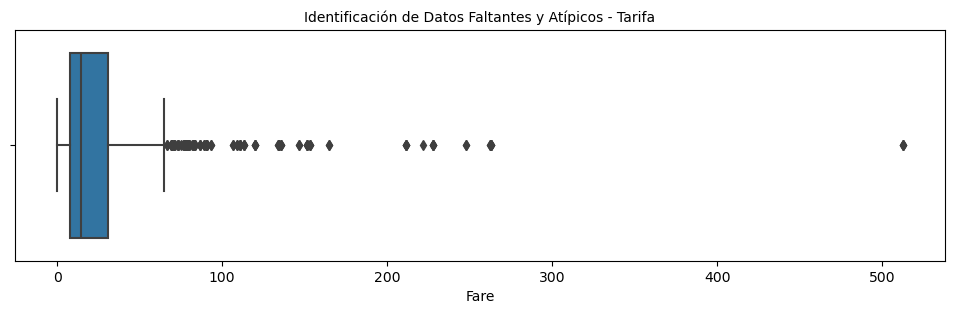

In [287]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos - Clase de Billete', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos - Edad', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos - Número de hermanos/cónyuges a bordo del Titanic', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Parch'])
plt.title('Identificación de Datos Faltantes y Atípicos - Número de padres/hijos a bordo del Titanic', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos - Tarifa', fontsize=10 )

<h3><b>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</b></h3>

In [288]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Superviviencia:            ",DatosRegresionLogistica['Survived'].isnull().sum())
print("Cantidad de Registros con cero en Clase de Billete:          ",DatosRegresionLogistica['Pclass'].isnull().sum())
print("Cantidad de Registros con cero en Sexo:                      ",DatosRegresionLogistica['Sex'].isnull().sum())
print("Cantidad de Registros con cero en Edad:                      ",DatosRegresionLogistica['Age'].isnull().sum())
print("Cantidad de Registros con cero en Hermanos/Conyuge:          ",DatosRegresionLogistica['SibSp'].isnull().sum())
print("Cantidad de Registros con cero en Padre/Hijos:               ",DatosRegresionLogistica['Parch'].isnull().sum())
print("Cantidad de Registros con cero en Boleto:                    ",DatosRegresionLogistica['Ticket'].isnull().sum())
print("Cantidad de Registros con cero en Tarifa:                    ",DatosRegresionLogistica['Fare'].isnull().sum())
print("Cantidad de Registros con cero en Cabina:                    ",DatosRegresionLogistica['Cabin'].isnull().sum())
print("Cantidad de Registros con cero en Embarcado:                 ",DatosRegresionLogistica['Embarked'].isnull().sum())

Cantidad de Registros con cero en Superviviencia:             0
Cantidad de Registros con cero en Clase de Billete:           0
Cantidad de Registros con cero en Sexo:                       0
Cantidad de Registros con cero en Edad:                       177
Cantidad de Registros con cero en Hermanos/Conyuge:           0
Cantidad de Registros con cero en Padre/Hijos:                0
Cantidad de Registros con cero en Boleto:                     0
Cantidad de Registros con cero en Tarifa:                     0
Cantidad de Registros con cero en Cabina:                     687
Cantidad de Registros con cero en Embarcado:                  2


In [289]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Clase de Billete:      ",DatosRegresionLogistica['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo:                  ",DatosRegresionLogistica['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad:                  ",DatosRegresionLogistica['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Boleto:                ",DatosRegresionLogistica['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa:                ",DatosRegresionLogistica['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina:                ",DatosRegresionLogistica['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcado:             ",DatosRegresionLogistica['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Clase de Billete:       0
Cantidad de Registros con cero en Sexo:                   0
Cantidad de Registros con cero en Edad:                   0
Cantidad de Registros con cero en Boleto:                 0
Cantidad de Registros con cero en Tarifa:                 15
Cantidad de Registros con cero en Cabina:                 0
Cantidad de Registros con cero en Embarcado:              0


In [290]:
#Limpieza de los datos como NaN
DatosRegresionLogistica["Age"] =   DatosRegresionLogistica["Age"].fillna(DatosRegresionLogistica["Age"].median())
DatosRegresionLogistica["Cabin"] = DatosRegresionLogistica["Cabin"].fillna(DatosRegresionLogistica["Cabin"].mode())
DatosRegresionLogistica["Embarked"] = DatosRegresionLogistica["Embarked"].fillna(DatosRegresionLogistica["Embarked"].mode())

#Limpieza de los datos como 0
DatosRegresionLogistica['Fare'] = DatosRegresionLogistica['Fare'].replace(0,DatosRegresionLogistica['Fare'].median())

In [291]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Superviviencia:            ",DatosRegresionLogistica['Survived'].isnull().sum())
print("Cantidad de Registros con cero en Clase de Billete:          ",DatosRegresionLogistica['Pclass'].isnull().sum())
print("Cantidad de Registros con cero en Sexo:                      ",DatosRegresionLogistica['Sex'].isnull().sum())
print("Cantidad de Registros con cero en Edad:                      ",DatosRegresionLogistica['Age'].isnull().sum())
print("Cantidad de Registros con cero en Hermanos/Conyuge:          ",DatosRegresionLogistica['SibSp'].isnull().sum())
print("Cantidad de Registros con cero en Padre/Hijos:               ",DatosRegresionLogistica['Parch'].isnull().sum())
print("Cantidad de Registros con cero en Boleto:                    ",DatosRegresionLogistica['Ticket'].isnull().sum())
print("Cantidad de Registros con cero en Tarifa:                    ",DatosRegresionLogistica['Fare'].isnull().sum())
print("Cantidad de Registros con cero en Cabina:                    ",DatosRegresionLogistica['Cabin'].isnull().sum())
print("Cantidad de Registros con cero en Embarcado:                 ",DatosRegresionLogistica['Embarked'].isnull().sum())

Cantidad de Registros con cero en Superviviencia:             0
Cantidad de Registros con cero en Clase de Billete:           0
Cantidad de Registros con cero en Sexo:                       0
Cantidad de Registros con cero en Edad:                       0
Cantidad de Registros con cero en Hermanos/Conyuge:           0
Cantidad de Registros con cero en Padre/Hijos:                0
Cantidad de Registros con cero en Boleto:                     0
Cantidad de Registros con cero en Tarifa:                     0
Cantidad de Registros con cero en Cabina:                     685
Cantidad de Registros con cero en Embarcado:                  2


In [292]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Clase de Billete:      ",DatosRegresionLogistica['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo:                  ",DatosRegresionLogistica['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad:                  ",DatosRegresionLogistica['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Boleto:                ",DatosRegresionLogistica['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa:                ",DatosRegresionLogistica['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina:                ",DatosRegresionLogistica['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcado:             ",DatosRegresionLogistica['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Clase de Billete:       0
Cantidad de Registros con cero en Sexo:                   0
Cantidad de Registros con cero en Edad:                   0
Cantidad de Registros con cero en Boleto:                 0
Cantidad de Registros con cero en Tarifa:                 0
Cantidad de Registros con cero en Cabina:                 0
Cantidad de Registros con cero en Embarcado:              0


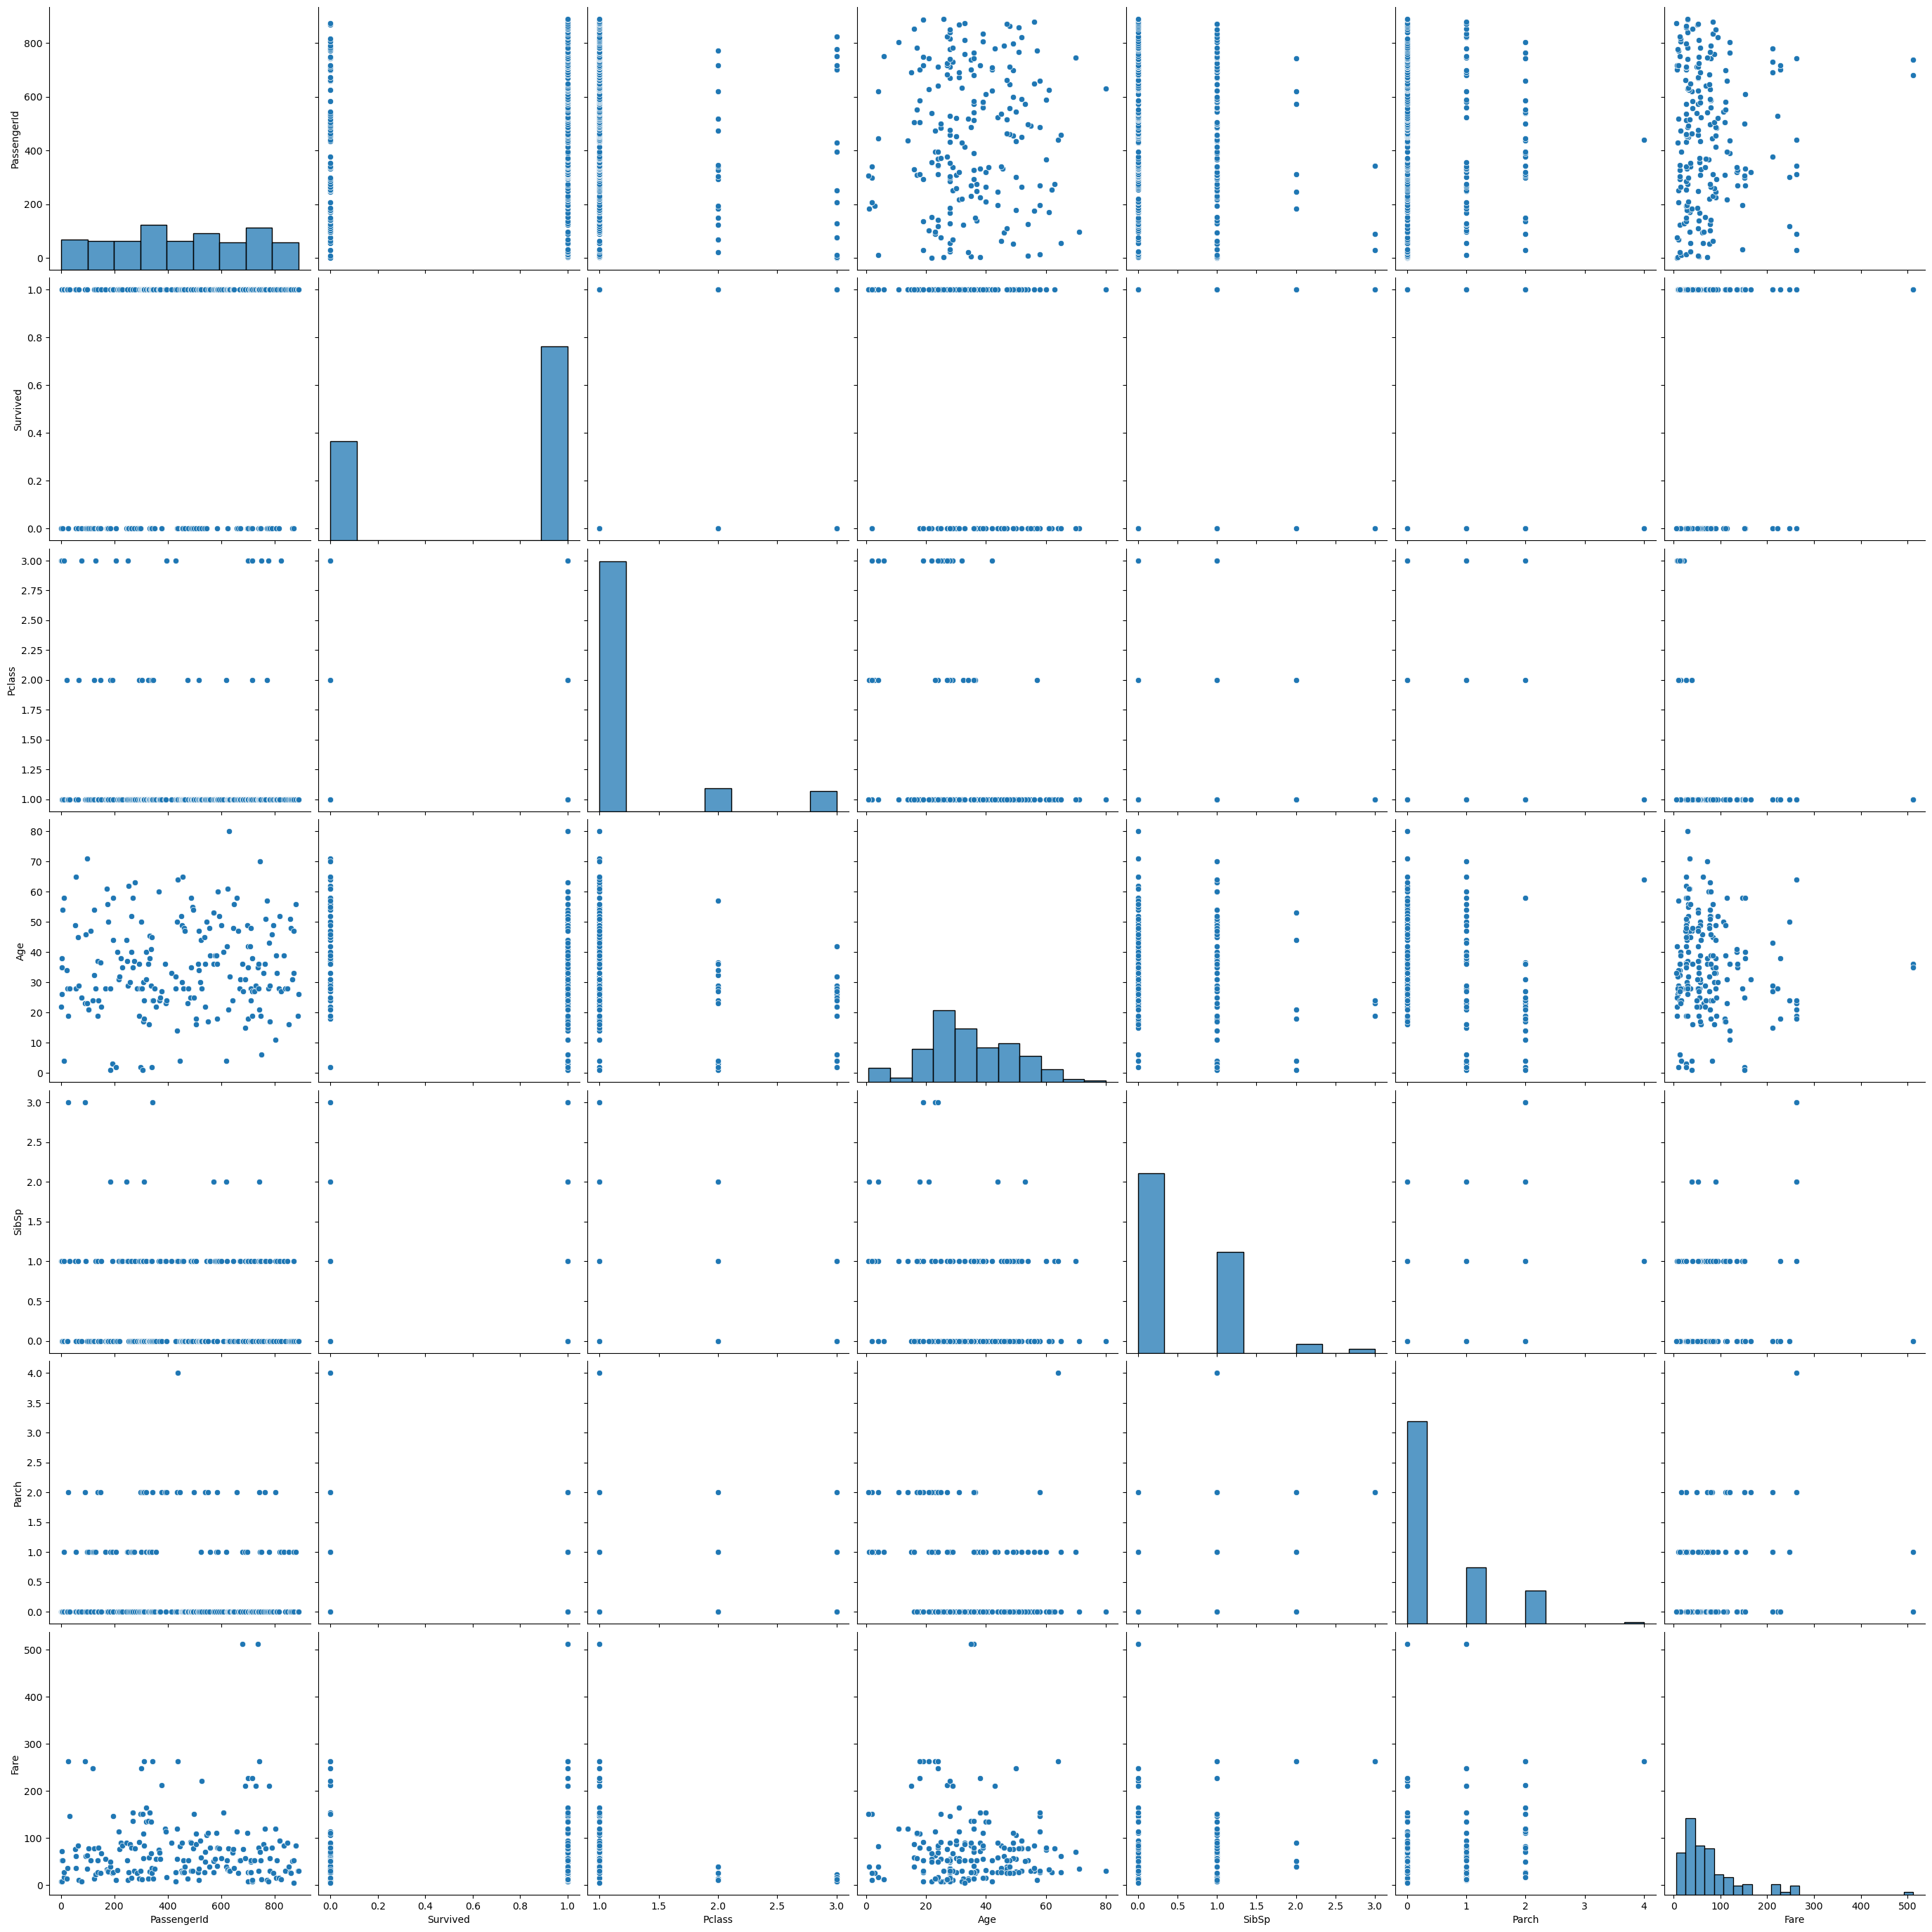

In [293]:
sns.pairplot(DatosRegresionLogistica.dropna(), size=4,kind='scatter')

In [294]:
#Revisión del tipo de datos y datos faltantes
DatosRegresionLogistica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        206 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
#Identificación de los datos atípicos
#No se encontraron ningún dato atipico.

<Axes: xlabel='PassengerId', ylabel='Age'>

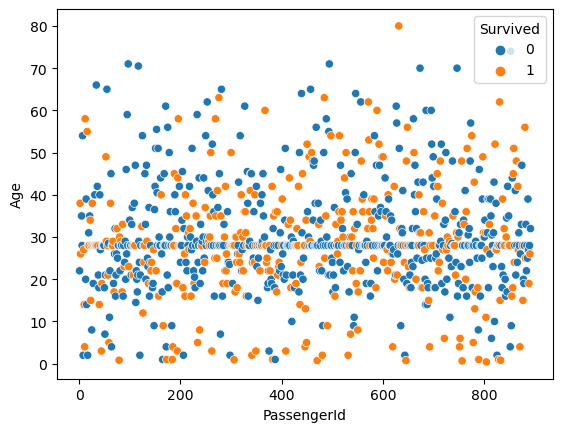

In [296]:
# Impresion de los primeros elementos en la dataset
sns.scatterplot(x = "PassengerId", y = "Age", hue = "Survived", data = DatosRegresionLogistica)

<h3><b>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</b></h3>

In [297]:
# Total de personas con superviviencia (sobrevivido o no: 0 = No, 1 = Sí)
DatosRegresionLogistica['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [298]:
# Impresion de los primeros elementos en la dataset
DatosRegresionLogistica[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


<h3><b>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</b></h3>

In [299]:
BDProbabilidad = DatosRegresionLogistica.drop('Name',axis=1)
BDProbabilidad = BDProbabilidad.drop('Sex',axis=1)
BDProbabilidad = BDProbabilidad.drop('Ticket',axis=1)
BDProbabilidad = BDProbabilidad.drop('Cabin',axis=1)
BDProbabilidad = BDProbabilidad.drop('Embarked',axis=1)

BDProbabilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [300]:
# Porcentaje de datos para entrenamiento (Train)=75% , y para Prueba (Test)=25%
X = BDProbabilidad.drop('Survived',axis=1)
Y = BDProbabilidad['Survived']

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 50)

In [301]:
# Impresión de la variable independiente de entrenamiento
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
220          221       3  16.0      0      0   8.0500
262          263       1  52.0      1      1  79.6500
179          180       3  36.0      0      0  14.4542
790          791       3  28.0      0      0   7.7500
487          488       1  58.0      0      0  29.7000
..           ...     ...   ...    ...    ...      ...
783          784       3  28.0      1      2  23.4500
677          678       3  18.0      0      0   9.8417
850          851       3   4.0      4      2  31.2750
423          424       3  28.0      1      1  14.4000
847          848       3  35.0      0      0   7.8958

[668 rows x 6 columns]


In [302]:
# Impresion de la variable dependiente de entrenamiento
print (Y_train)

220    1
262    0
179    0
790    0
487    0
      ..
783    0
677    1
850    0
423    0
847    0
Name: Survived, Length: 668, dtype: int64


<h3><b>5. Entrenar el modelo configurando los diferentes hiperparámetros.</b></h3>

In [303]:
# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(X_train, Y_train) 

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [304]:
# imprimir la vairable de prueba
print (Y_test)

203    0
634    0
462    0
90     0
863    0
      ..
115    0
673    1
443    1
302    0
77     0
Name: Survived, Length: 223, dtype: int64


In [305]:
# Impresion de la predicción del modelo de logistica
print ( "EL modelo de predicción: ")
print (Prediccion)

EL modelo de predicción: 
[0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0]


<h3><b>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</b></h3>

In [306]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       137
           1       0.62      0.45      0.52        86

    accuracy                           0.68       223
   macro avg       0.66      0.64      0.64       223
weighted avg       0.67      0.68      0.67       223



<h3><b>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</b></h3>

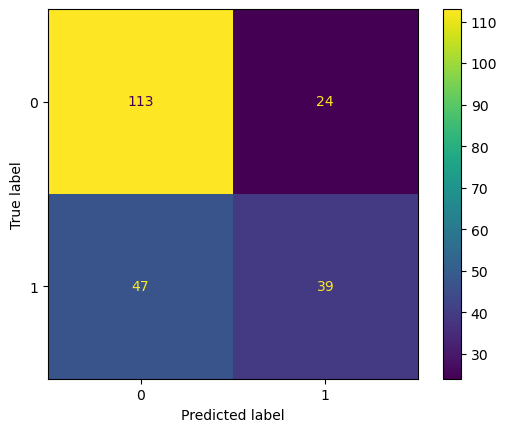

In [307]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

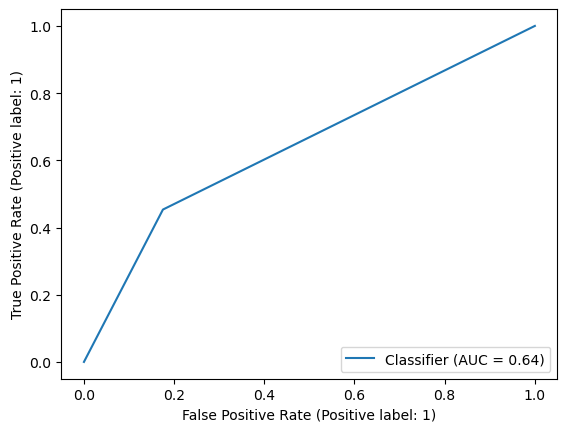

In [308]:
# Curva de precisón del modelo
#  (sobrevivido o no: 0 = No, 1 = Sí)
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<Axes: ylabel='Survived'>

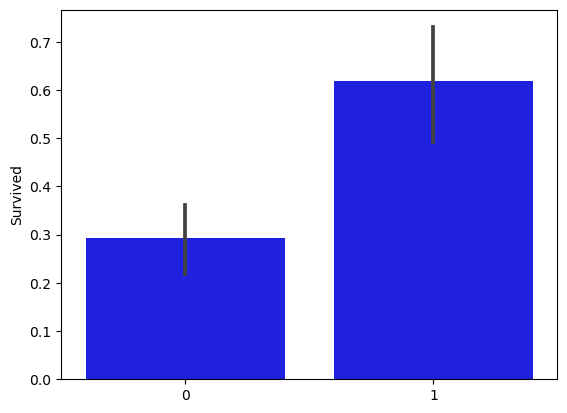

In [309]:
#Matrix de barra prediciones
# (sobrevivido o no: 0 = No, 1 = Sí)
sns.barplot(x=Prediccion, y=Y_test, color='b')

<h3><b>8. Interpretar, analizar y documentar los resultados obtenidos.</b></h3>

<b>Del desempeño del modelo se puede describir</b>:
<ol>
<li>Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Sobrevivio" es 0,71 y 0,62, lo que significa que el 66,5% de los prediciones como superviviencia por el modelo.</li>
<li>Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Sobrevivio" es 0,82 y 0,45, obteniendo como resultado, lo que indica que el modelo identificó correctamente al 63,5% de todos los supervivientes.</li>
<li>F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "Sobrevivio" es 64% obteniendo como resultado (0 76% y para 1 52%), lo que indica un equilibrio entre precisión y recuerdo.</li>
</ol>

<b>De la Matriz de confusión se puede interpretar</b>:
<ol>
<li>Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 24</li>
<li>Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 39</li> 
<li>Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 113</li>
<li>Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 47</li>
</ol>

<b>De la curva de precisión del modelo se puede interpretar:<b>
<ol>
<li>El AUC es 0,64 lo que significa que el 64% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
</li>
</ol>